In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
punched_u = np.load('punched_u.npy')
original_u = np.load('original_u.npy')
restored_u = np.load('reconstructed_u.npy')
dx = 0.05
dy = 0.02
dz = 0.01 # these values need to be copied from TestingDifferentAspectRatios.ipynb
X = np.arange(0, 2.001, dx)
Y = np.arange(0, 2.001, dy)
Z = np.arange(0, 2.001, dz)
XGrid, YGrid = np.meshgrid(X, Y)



restored_u = restored_u.reshape((len(X), len(Y), len(Z)))
original_u = original_u.reshape((len(X), len(Y), len(Z)))
punched_u = punched_u.reshape((len(X), len(Y), len(Z)))

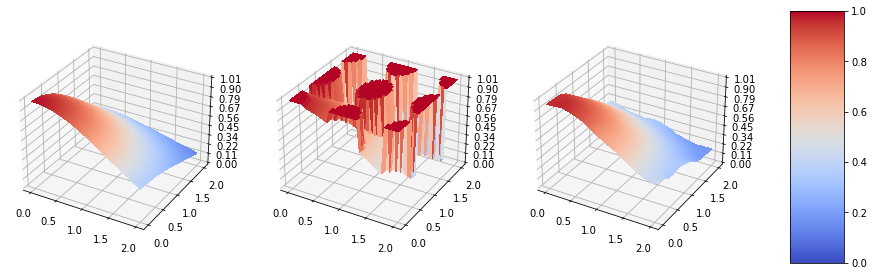

In [57]:
idx = 20
fig, ax = plt.subplots(1,3, figsize=(15,5), subplot_kw={"projection": "3d"})
surf = ax[0].plot_surface(XGrid, YGrid, original_u[:,:,idx].T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
# Customize the z axis.
ax[0].set_zlim(0, 1.01)
ax[0].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[0].zaxis.set_major_formatter('{x:.02f}')

surf1 = ax[1].plot_surface(XGrid, YGrid, punched_u[:,:,idx].T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
# Customize the z axis.
ax[1].set_zlim(0, 1.01)
ax[1].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[1].zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
surf2 = ax[2].plot_surface(XGrid, YGrid, restored_u[:,:,idx].T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, vmin=0, vmax=1)
#fig.colorbar(surf1, shrink=0.5, aspect=5)
ax[2].set_zlim(0, 1.01)
ax[2].zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax[2].zaxis.set_major_formatter('{x:.02f}')

#fig.colorbar(surf2, shrink=0.5, aspect=5)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(surf2, cax=cbar_ax)

plt.show()

In [58]:
print(np.linalg.norm(restored_u[:,:,10] - original_u[:,:,10]))

0.7578599845452397
